In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin
In this notebook, we will do numerical simulations of $d$-dimensional random walks. Then we will make a comparison between our numerical results for the **expected number of returns to the origin** and compare them with the answer to *Exercise 2.1: Return to the origin in random walks.*

## Generating Random Walks


### Exercise
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
>>> # position after 4 time-steps
>>> traj[4]
array([ 3., -1., -1.])
>>> # second component of the trajectory, for all times
>>> # python uses 0-indexing!
>>> traj[:, 1] 
array([0, -1., -1., -1., -1.,  0.,  0.,  1.,  1.,  1.])
```


In [2]:
def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW


    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    traj = np.ndarray(shape=(length,dim), dtype=int)
    for p in range(length):
        random_dim = np.random.randint(0,dim)
        x = np.zeros(dim)
        if(np.random.uniform() < 0.5):         
            x[random_dim]+=1
        else:
            x[random_dim]+=-1
        traj[p] = x
    return np.cumsum(traj,axis=0)

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [3]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length=length, dim=dim)
        # make sure traj has the right shape
        assert traj.shape == (length, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length - 1))

### Exercise
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [19]:
# it is better if you use one cell to generate the random walks, and a second cell to plot them
RW_1d = get_traj(10000,1)
RW_2d = get_traj(10000,2)
x = np.arange(0,10000,1)
#print(RW_2d)

Text(0, 0.5, '$y$')

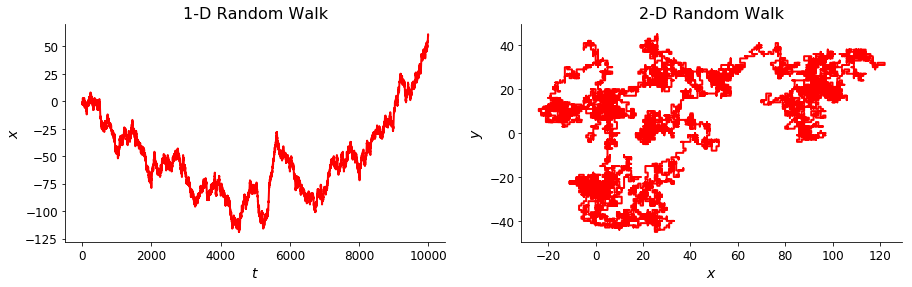

In [20]:
# We generate a figure with two subplots, called axis in matplotlib.
#
# To use the left subplot, we do
# ax1.plot(...)
#
# while to use the right subplot, we do
# ax2.plot(..)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(
        x, RW_1d,
        color="red",
        lw=2,
        label="1_D Random walk"
        )
ax2.plot(
        RW_2d[:,0], RW_2d[:,1],
        color="red",
        lw=2,
        label="2_D Random walk"
        )
ax1.set_title("1-D Random Walk")
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$x$")
ax2.set_title("2-D Random Walk")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")


## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [6]:
def get_num_returns(length, dim):
    # generate a RW of given length and dimension
    traj = get_traj(length, dim)
    # count how many times it goes through the origin
    traj = traj == 0
    check = np.zeros(length)
    np.all(traj, axis=1, out=check)
    num_returns_to_origin = np.sum(check)
    return num_returns_to_origin

### Exercise
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [7]:
def get_average_num_returns(length, dim, num_trajs=200):
    ave=0
    for i in range(num_trajs):
        ave+=get_num_returns(length, dim)
    ave=ave/num_trajs
    return ave

In [8]:
get_average_num_returns(100000,2,10)

5.1

## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [9]:
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [10]:
dim=1
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

### Exercise
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the analytical result from problem 2.1. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

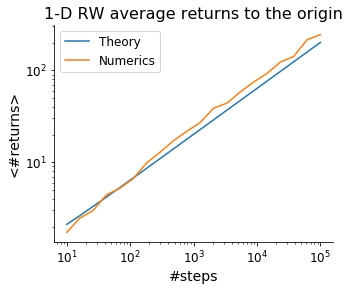

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result
x = length_array
t = 2*np.sqrt(x+1)/np.pi
ax.loglog(x,t, label="Theory")
# plot numerical result
ax.loglog(x,num_returns_array, label="Numerics")
# add axis labels
ax.set_xlabel("#steps")
ax.set_ylabel("<#returns>")
# add a legend
ax.legend()
# add a title (e.g. that says what dimension we used)
ax.set_title("1-D RW average returns to the origin")
plt.show()

### Exercise
Plot the average number of returns to the origin of a 2D RW as a function of the RW length, together with the analytical result from problem 2.1. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

In [29]:
# do the simulations for d=2
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])
dim=2
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

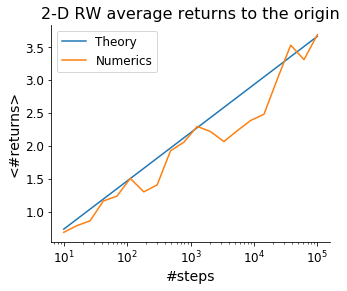

In [31]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result
x = length_array
t = np.log(x)/np.pi
ax.plot(x,t, label="Theory")
# plot numerical result
ax.plot(x,num_returns_array, label="Numerics")
# add axis labels
ax.set_xlabel("#steps")
ax.set_ylabel("<#returns>")
#set axis scale
ax.set_xscale('log')
# add a legend
ax.legend()
# add a title (e.g. that says what dimension we used)
ax.set_title("2-D RW average returns to the origin")
plt.show()

### Exercise
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**, as we proved in problem 2.1 (actually, we proved that that holds for any $d \geq 3$).

In [38]:
# do the simulations for d=3&4
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=15)
])
dim=3
num_returns_array_3D = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])
dim=4
num_returns_array_4D = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

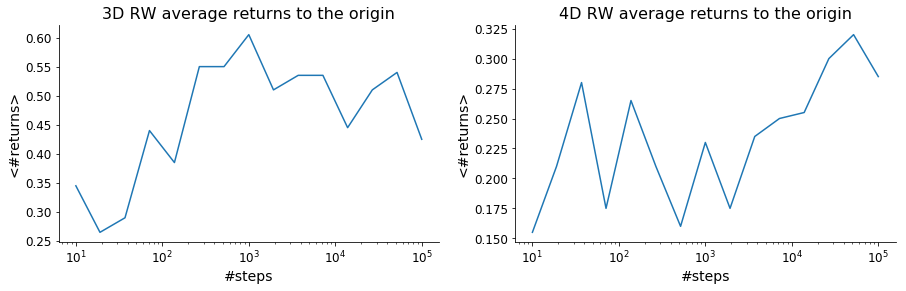

In [39]:
# plot the numerical results + theory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# plot 3D result
x = length_array
t = np.log(x)/np.pi
ax1.plot(x,num_returns_array_3D, label="3-D")
# plot 4D result
ax2.plot(x,num_returns_array_4D, label="4-D")
# add axis labels
ax1.set_xlabel("#steps")
ax1.set_ylabel("<#returns>")
ax2.set_xlabel("#steps")
ax2.set_ylabel("<#returns>")
#set axis scale
ax1.set_xscale('log')
ax2.set_xscale('log')
# add a title (e.g. that says what dimension we used)
ax1.set_title("3D RW average returns to the origin")
ax2.set_title("4D RW average returns to the origin")
plt.show()